#pre-process

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/NLP

/content/drive/MyDrive/Colab_Notebooks/NLP


In [ ]:
with open("/content/drive/MyDrive/en_US.twitter.txt", "r") as f:
    data = f.read()
print("Data type:", type(data))
print("Number of letters:", len(data))
print("First 300 letters of the data")
print("-------")
test_data = data[500000:510000]
data = data[0:500000]
display(data[0:300])
print("-------")

print("Last 300 letters of the data")
print("-------")
display(data[-300:])
print("-------")

Data type: <class 'str'>
Number of letters: 164456396
First 300 letters of the data
-------


"How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\nWhen you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.\nthey've decided its more fun if I don't.\nSo Tired D; Played Lazer Tag & Ran A "

-------
Last 300 letters of the data
-------


't, But no one truly knows.\nMy brother: pardon my nuts. *continues to walk around naked*\nI Had a dream that all my teeth had visible cavities! what a nightmare!\nNext on the to do list: replace with Joe Benanati.\nMade mailbox labels, cleaned laundry room & fitness room, typed, walked a pup, went to st'

-------


In [ ]:
def split_to_sentences(data):
  sentences = data.split('\n')

  sentences = [s.strip() for s in sentences]
  sentences = [s for s in sentences if len(s) > 0]

  return sentences

In [ ]:
def tokenize_sentences(sentences):
    tokenized_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        tokenized = nltk.word_tokenize(sentence)
        tokenized_sentences.append(tokenized)
    return tokenized_sentences

In [ ]:
def get_tokenized_data(data):
    sentences = split_to_sentences(data)
    tokenized_sentences = tokenize_sentences(sentences)
    return tokenized_sentences

In [ ]:
tokenized_data = get_tokenized_data(data)
random.seed(87)
random.shuffle(tokenized_data)

train_size = int(len(tokenized_data) * 0.8)
train_data = tokenized_data[0:train_size]
test_data = tokenized_data[train_size:]

In [ ]:
for i in range(70):
  true_sentence = " ".join(train_data[i*2])
  print ('"' + true_sentence+ '"' )

"i do n't put much faith in any nd players"
"streeter on drop in draft : “ i ’ m extremely hungry . i kind of felt like a lot of people didn ’ t believe in me even though i believe in myself . ''"
"i could care less about klout , but um ... thanks ? : - )"
"why the fuck are girls always so moody"
"i could go for a nice post dinner cheese plate . what kind of host are you , ?"
"i swear , waiting to hear back about being booked for a show or not is the most stressful experience in life ."
"engineering dev manager-excellent leadership opportunity in bellevue"
"i love sequels !"
"looking for strategic partners in developing an automated health coach using interactive video"
"ed hardy and douchebaggery not dead in vegas ."
"i love u to stay strong and tell danica i will be praying and i will tlk to her tomar"
"yeah , what veronica said ."
"did you win ?"
"counter point to the fence issue : `` then the players would n't be able to get onto the field , duh . ''"
"good thing poverty has now se

In [ ]:
display(train_data[0:5])

[['i', 'do', "n't", 'put', 'much', 'faith', 'in', 'any', 'nd', 'players'],
 ['heading',
  'out',
  'soon',
  '.',
  'will',
  'be',
  'at',
  'augusta',
  'this',
  'afternoon',
  '.',
  'excited',
  '!'],
 ['streeter',
  'on',
  'drop',
  'in',
  'draft',
  ':',
  '“',
  'i',
  '’',
  'm',
  'extremely',
  'hungry',
  '.',
  'i',
  'kind',
  'of',
  'felt',
  'like',
  'a',
  'lot',
  'of',
  'people',
  'didn',
  '’',
  't',
  'believe',
  'in',
  'me',
  'even',
  'though',
  'i',
  'believe',
  'in',
  'myself',
  '.',
  "''"],
 ['$',
  '5.00',
  'hennessy',
  'until',
  '11:00pm',
  '.',
  'lots',
  'of',
  'hot',
  'girls',
  'in',
  'the',
  'building',
  '..........',
  'so',
  'come',
  'get',
  'a',
  'stiff',
  'one',
  '........'],
 ['i',
  'could',
  'care',
  'less',
  'about',
  'klout',
  ',',
  'but',
  'um',
  '...',
  'thanks',
  '?',
  ':',
  '-',
  ')']]

In [ ]:
print("{} data are split into {} train and {} test set".format(
    len(tokenized_data), len(train_data), len(test_data)))

print("First training sample:")
print(train_data[0])

print("First test sample")
print(test_data[2])

4341 data are split into 3472 train and 869 test set
First training sample:
['congrats', 'to', 'all', 'who', 'made', 'last', 'night', 'a', 'sellout', '..', 'come']
First test sample
['and', 'r', 'u', 'still', 'comin']


In [ ]:
len(train_data)

5772

In [ ]:
len(test_data)

1444

In [ ]:
def count_words(tokenized_sentences):
    word_counts = {}
    for sentence in tokenized_sentences:
        for token in sentence:
            if token not in word_counts.keys():
                word_counts[token] = 1
            else:
                word_counts[token] += 1
    return word_counts

In [ ]:
def get_words_with_nplus_frequency(tokenized_sentences, count_threshold):
    closed_vocab = []

    word_counts = count_words(tokenized_sentences)

    for word, cnt in word_counts.items():
        if cnt >= count_threshold:
            closed_vocab.append(word)

    return closed_vocab

In [ ]:
def replace_oov_words_by_unk(tokenized_sentences, vocabulary, unknown_token="<unk>"):
    vocabulary = set(vocabulary)
    replaced_tokenized_sentences = []

    for sentence in tokenized_sentences:

        replaced_sentence = []

        for token in sentence:

            if token in vocabulary:
                replaced_sentence.append(token)
            else:
                replaced_sentence.append(unknown_token)

        replaced_tokenized_sentences.append(replaced_sentence)

    return replaced_tokenized_sentences

In [ ]:
print (train_data)

[['congrats', 'to', 'all', 'who', 'made', 'last', 'night', 'a', 'sellout', '..', 'come'], ['thank', 'you', '!'], ['oh', '-', 'thank', 'you', 'so', 'much', ':', '-d'], ['i', 'do', "n't", 'see', 'it', 'coming', 'with', 'an', 'ipad', 'or', 'a', 'iphone', '.', 'makes', 'no', 'sense', '.', 'with', 'an', 'apple', 'tv', 'or', 'apple', 'branded', 'tv', ',', 'yes', '.'], ['please', 'pardon', 'my', 'timeline', 'for', 'the', 'next', 'hour', '.', 'i', 'am', 'joining', 'monthly', 'chat', '.', 'join', 'us', 'to', 'learn', 'more', '.'], ['politicalspeak', 'is', 'frustrating', '.'], ['fact', ':', 'typewriter', 'is', 'the', 'longest', 'english', 'word', 'that', 'can', 'be', 'made', 'using', 'only', 'the', 'letters', 'on', 'the', 'top', 'row', 'of', 'a', 'computer', 'keyboard', '.'], ['try', 'not', 'to', 'rush', 'into', 'things'], ['seriously', '?', 'i', "'ll", 'have', 'to', 'check', 'it', 'out', '!'], ['u', 'better', '!', '!', '!'], ['sid', 'is', 'back'], ['in', '3', 'weeks', 'i', "'ll", 'be', 'done', 

In [ ]:
def preprocess_data(train_data, test_data, count_threshold):
    vocabulary = get_words_with_nplus_frequency(train_data,count_threshold)

    train_data_replaced = replace_oov_words_by_unk(train_data,vocabulary)

    test_data_replaced = replace_oov_words_by_unk(test_data,vocabulary)

    return train_data_replaced, test_data_replaced, vocabulary

In [ ]:
minimum_freq = 1
train_data_processed, test_data_processed, vocabulary = preprocess_data(train_data,
                                                                        test_data,
                                                                        minimum_freq)

In [ ]:
display (train_data_processed[0:140:2])

[['congrats',
  'to',
  'all',
  'who',
  'made',
  'last',
  'night',
  'a',
  'sellout',
  '..',
  'come'],
 ['oh', '-', 'thank', 'you', 'so', 'much', ':', '-d'],
 ['please',
  'pardon',
  'my',
  'timeline',
  'for',
  'the',
  'next',
  'hour',
  '.',
  'i',
  'am',
  'joining',
  'monthly',
  'chat',
  '.',
  'join',
  'us',
  'to',
  'learn',
  'more',
  '.'],
 ['fact',
  ':',
  'typewriter',
  'is',
  'the',
  'longest',
  'english',
  'word',
  'that',
  'can',
  'be',
  'made',
  'using',
  'only',
  'the',
  'letters',
  'on',
  'the',
  'top',
  'row',
  'of',
  'a',
  'computer',
  'keyboard',
  '.'],
 ['seriously', '?', 'i', "'ll", 'have', 'to', 'check', 'it', 'out', '!'],
 ['sid', 'is', 'back'],
 ['#',
  'foodhubs',
  'are',
  'becoming',
  'key',
  'aggregation',
  'point',
  'for',
  'traditional',
  'distributors',
  '(',
  'so',
  'cool',
  'for',
  'producers',
  '!',
  ')'],
 ['couples', 'jeggings', '!', 'brilliant', '!'],
 ['sometimes',
  'you',
  'got',
  'ta',
  

In [ ]:

print("First preprocessed training sample:")
print(train_data_processed[0])
print()
print("First preprocessed test sample:")
print(test_data_processed[0])
print()
print("First 10 vocabulary:")
print(vocabulary[0:10])
print()
print("Size of vocabulary:", len(vocabulary))

First preprocessed training sample:
['congrats', 'to', 'all', 'who', 'made', 'last', 'night', 'a', 'sellout', '..', 'come']

First preprocessed test sample:
['<unk>', 'beef', 'going', 'on', '<unk>', 'is', 'what', 'we', 'live', 'by', 'peace', 'love', '<unk>', 'and', 'respect', '.']

First 10 vocabulary:
['congrats', 'to', 'all', 'who', 'made', 'last', 'night', 'a', 'sellout', '..']

Size of vocabulary: 8274


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Input, Dense
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data_processed)
pickle.dump(tokenizer,open('token.pk1','wb'))
# Chuyển đổi văn bản thành các chuỗi số
sequences = tokenizer.texts_to_sequences(train_data_processed)

# Xác định độ dài tối đa của câu
max_sequence_length = max(len(seq) for seq in sequences)

my_input_sequence = []
for line in sequences:
  for i in range(1,len(line)):
    my_n_gram_sequence = line[:i+1]
    # print (my_n_gram_sequence)
    my_input_sequence.append(my_n_gram_sequence)
# print (my_input_sequence)

# Chuẩn bị dữ liệu đầu vào và đầu ra cho mô hình
sequences_padded = np.array(pad_sequences(my_input_sequence, maxlen=max_sequence_length, padding='pre'))

encoder_input_data = sequences_padded[:, :-1]
decoder_input_data = sequences_padded[:,-1]
# decoder_target_data = np.zeros((len(sequences), max_sequence_length-1, len(tokenizer.word_index) + 1), dtype='float32')

# for i, seq in enumerate(sequences):
#     for t, word_index in enumerate(seq[:-1]):
#         decoder_target_data[i, t, word_index] = 1.0

# Định nghĩa mô hình Seq2Seq LSTM
latent_dim = 256

# Encoder
encoder_inputs = Input(shape=(max_sequence_length - 1,))
encoder_embedding = Embedding(len(tokenizer.word_index) + 1, latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_sequence_length - 1,))
decoder_embedding = Embedding(len(tokenizer.word_index) + 1, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(len(tokenizer.word_index))

In [ ]:
decoder_input_data[1]

37

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
decoder_target_data = np.array(tf.keras.utils.to_categorical(decoder_input_data,num_classes= vocab_size  ))

In [ ]:
vocab_size

8275

In [ ]:
max_sequence_length

40

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,100, input_length=max_sequence_length-1))
model.add(LSTM(100,return_sequences = True))
model.add(LSTM(500))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(vocab_size,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 39, 100)           827500    
                                                                 
 lstm_2 (LSTM)               (None, 39, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 500)               1202000   
                                                                 
 dense_1 (Dense)             (None, 1000)              501000    
                                                                 
 dense_2 (Dense)             (None, 8275)              8283275   
                                                                 
Total params: 10894175 (41.56 MB)
Trainable params: 10894175 (41.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


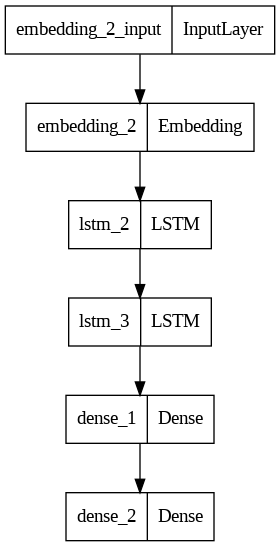

In [ ]:
from tensorflow import keras
from keras.utils import plot_model

keras.utils.plot_model(model,to_file='plot.png',show_layer_names=True)

#Train LSTM model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

checkpoint = ModelCheckpoint("next_words.h5",monitor = 'loss', verbose = 1, save_best_only = True)
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam')
model.fit(encoder_input_data,decoder_target_data,epochs = 100, batch_size=64,callbacks=[checkpoint])

Epoch 1/100
784/784 [==============================] - ETA: 0s - loss: 6.8490
Epoch 1: loss improved from inf to 6.84896, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


784/784 [==============================] - 42s 47ms/step - loss: 6.8490
Epoch 2/100
784/784 [==============================] - ETA: 0s - loss: 6.5695
Epoch 2: loss improved from 6.84896 to 6.56953, saving model to next_words.h5
784/784 [==============================] - 18s 23ms/step - loss: 6.5695
Epoch 3/100
784/784 [==============================] - ETA: 0s - loss: 6.4084
Epoch 3: loss improved from 6.56953 to 6.40845, saving model to next_words.h5
784/784 [==============================] - 16s 21ms/step - loss: 6.4084
Epoch 4/100
784/784 [==============================] - ETA: 0s - loss: 6.1468
Epoch 4: loss improved from 6.40845 to 6.14681, saving model to next_words.h5
784/784 [==============================] - 18s 23ms/step - loss: 6.1468
Epoch 5/100
782/784 [============================>.] - ETA: 0s - loss: 5.8969
Epoch 5: loss improved from 6.14681 to 5.89708, saving model to next_words.h5
784/784 [==============================] - 18s 23ms/step - loss: 5.8971
Epoch 6/100
784/

#Loadmodel

In [ ]:
%ls

'Bản sao của CS221_project.ipynb'   final.ipynb     output.txt               token.pk1
 data/                              next_words.h5   plot.png
 final_data/                        NLP_RNN.ipynb   test_transformer.ipynb


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
import pyperclip

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pk1','rb'))

def Predict_Next_Words(model,tokenizer,text,number_word):
  list_sentence = []
  # print (text)
  pre_text = len(text.split())
  for _ in range(number_word):
    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = pad_sequences([sequence],maxlen=max_sequence_length-1,padding = 'pre')

    preds = np.argmax(model.predict(sequence),axis=-1)
    predicted_word = ""

    for key, value in tokenizer.word_index.items():
      if value == preds:
        predicted_word = key
        break
    text += " " + predicted_word
    temp_text = ""
    temp_text = text
    # print (pre_text)
    for _ in range(5-(len(text.split())-pre_text)):
      temp_text +=" " + "<unk>"
    list_sentence.append(temp_text)
    # print (text)
  return list_sentence

In [ ]:
from collections import defaultdict

class NGramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_counts = defaultdict(int)
        self.context_counts = defaultdict(int)

    def train(self, corpus):
        for sentence in corpus:
            sentence = ['<start>'] + sentence + ['<end>']
            for i in range(len(sentence) - self.n + 1):
                ngram = tuple(sentence[i:i + self.n])
                context = tuple(sentence[i:i + self.n - 1])
                self.ngram_counts[ngram] += 1
                self.context_counts[context] += 1

    def calculate_probability(self, sentence):
        total_ngrams = len(sentence) - self.n + 1
        sentence_probability = 1.0
        sentence = '<start> ' + sentence + ' <end>'

        for i in range(len(sentence) - self.n + 1):
            ngram = tuple(sentence[i:i + self.n])
            context = tuple(sentence[i:i + self.n - 1])

            # Laplace smoothing to handle unseen N-grams
            ngram_count = self.ngram_counts[ngram] + 1
            context_count = self.context_counts[context] + len(set(sentence))  # Assuming vocabulary size

            ngram_probability = ngram_count / context_count
            sentence_probability *= ngram_probability

        return sentence_probability

n = 3  # Độ dài của N-gram (ví dụ: trigram)
ngram_model = NGramModel(n)
ngram_model.train(train_data_processed)

In [ ]:
test_sentences = ['Thank you <unk> <unk> <unk>', 'Thank you abc xyz <unk>','Thank you abc xyz hello like']
max_prob = 0
for sen in test_sentences:
  probability = ngram_model.calculate_probability(sen)
  if probability > max_prob:
    max_prob = probability
  print(f"Xác suất của câu '{sen}' là: {probability}")
print(max_prob)

Xác suất của câu 'Thank you <unk> <unk> <unk>' là: 1.0947644252537633e-47
Xác suất của câu 'Thank you abc xyz <unk>' là: 2.910383045673376e-46
Xác suất của câu 'Thank you abc xyz hello like' là: 2.0095220090461242e-54
2.910383045673376e-46


In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._collect_words(node, prefix)

    def _collect_words(self, node, prefix):
        words = []
        if node.is_end_of_word:
            words.append(prefix)
        for char, child_node in node.children.items():
            words.extend(self._collect_words(child_node, prefix + char))
        return words

    def complete_and_fix_word(self, word):
        completions = self.starts_with(word)
        if completions:
            return completions[0]
        else:
            return self._fix_word(word)

    def _fix_word(self, word):
        candidates = self.starts_with(word[0])
        min_distance = float('inf')
        best_match = ''

        for candidate in candidates:
            distance = self._edit_distance(word, candidate)
            if distance < min_distance:
                min_distance = distance
                best_match = candidate

        return best_match

    def _edit_distance(self, word1, word2):
        m, n = len(word1), len(word2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            dp[i][0] = i
        for j in range(n + 1):
            dp[0][j] = j

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if word1[i - 1] == word2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

        return dp[m][n]


# Example usage:
trie = Trie()
words = vocabulary
print (words)
for word in words:
    trie.insert(word)

word = "h"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)

word = "ban"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)

word = "o"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)

['congrats', 'to', 'all', 'who', 'made', 'last', 'night', 'a', 'sellout', '..', 'come', 'thank', 'you', '!', 'oh', '-', 'so', 'much', ':', '-d', 'i', 'do', "n't", 'see', 'it', 'coming', 'with', 'an', 'ipad', 'or', 'iphone', '.', 'makes', 'no', 'sense', 'apple', 'tv', 'branded', ',', 'yes', 'please', 'pardon', 'my', 'timeline', 'for', 'the', 'next', 'hour', 'am', 'joining', 'monthly', 'chat', 'join', 'us', 'learn', 'more', 'politicalspeak', 'is', 'frustrating', 'fact', 'typewriter', 'longest', 'english', 'word', 'that', 'can', 'be', 'using', 'only', 'letters', 'on', 'top', 'row', 'of', 'computer', 'keyboard', 'try', 'not', 'rush', 'into', 'things', 'seriously', '?', "'ll", 'have', 'check', 'out', 'u', 'better', 'sid', 'back', 'in', '3', 'weeks', 'done', 'college', '.....', "'m", 'really', 'thinking', 'about', 'leaving', 'chicago', '#', 'foodhubs', 'are', 'becoming', 'key', 'aggregation', 'point', 'traditional', 'distributors', '(', 'cool', 'producers', ')', 'had', 'blast', 'too', 'look'

In [ ]:
print (tokenizer.word_index)

{'.': 1, '!': 2, 'the': 3, 'i': 4, 'to': 5, ',': 6, 'a': 7, 'you': 8, '?': 9, 'and': 10, 'it': 11, 'for': 12, ':': 13, 'of': 14, 'is': 15, 'in': 16, "'s": 17, 'that': 18, '#': 19, 'my': 20, 'on': 21, ')': 22, "n't": 23, 'me': 24, 'be': 25, '...': 26, 'do': 27, 'at': 28, 'with': 29, 'so': 30, 'are': 31, 'this': 32, 'we': 33, 'have': 34, 'just': 35, 'your': 36, 'all': 37, 'what': 38, 'up': 39, 'not': 40, 'was': 41, "'m": 42, 'love': 43, 'but': 44, '``': 45, "''": 46, 'like': 47, 'get': 48, '(': 49, '&': 50, 'good': 51, 'one': 52, 'if': 53, 'day': 54, 'can': 55, 'out': 56, 'will': 57, '-': 58, 'thanks': 59, 'from': 60, 'about': 61, 'they': 62, 'how': 63, 'rt': 64, 'know': 65, 'u': 66, 'no': 67, 'go': 68, 'or': 69, 'great': 70, 'there': 71, 'as': 72, 'time': 73, 'now': 74, 'when': 75, 'today': 76, 'got': 77, 'would': 78, 'new': 79, '..': 80, 'by': 81, 'he': 82, 'lol': 83, 'going': 84, 'see': 85, 'more': 86, 'some': 87, 'follow': 88, 'an': 89, 'who': 90, 'our': 91, 'want': 92, "'re": 93, 'b

In [ ]:
if '.' in tokenizer.word_index:
       print('true')

true


In [ ]:
count = 0
sum = 0
for i in range (len(test_data)):
  for j in range(len(test_data[i])):
    if test_data[i][j] in tokenizer.word_index:
      count +=1
    sum +=1
print (count)
print (sum)

12281
13582


#define score

In [ ]:
count = 0
sum = 0

for i in range(len(test_data)):
  test_word = test_data[i][0]
  for j in range (1,3):
    if (j >= len(test_data[i])):
      continue
    else:
      test_word += " " + test_data[i][j]
  try:
      # print (test_word)
      # text = trie.complete_and_fix_word(test_word)
      test_sentences = Predict_Next_Words(model,tokenizer,test_word,5)
      print (test_sentences)
      max_prob = []
      for sen in test_sentences:
          probability = ngram_model.calculate_probability(sen)
          max_prob.append([probability])
          # print(f"Xác suất của câu '{sen}' là: {probability}")
      predict_sentence = test_sentences[np.argmax(max_prob)]
      token_predict_sentence = predict_sentence.split()
      while (token_predict_sentence[-1] == "<unk>"):
        token_predict_sentence.pop()
      print (token_predict_sentence)
      print (test_data[i])
      if (len(token_predict_sentence) > len(test_data[i])):
        sum += len(test_data[i])
        for k in range (test_data[i]):
          if (token_predict_sentence[k] == test_data[i][k]):
            count += 1
      else:
        sum += len(token_predict_sentence)
        for k in range (len(token_predict_sentence)):
          if (token_predict_sentence[k] == test_data[i][k]):
            count += 1
  except Exception as e:
      print ('Error occurred: ',e)
  continue
print (count)
print (sum)

1/1 [==============================] - 0s 38ms/step
['tweefer beef going to <unk> <unk> <unk> <unk>', 'tweefer beef going to be <unk> <unk> <unk>', 'tweefer beef going to be more <unk> <unk>', 'tweefer beef going to be more selective <unk>', 'tweefer beef going to be more selective with']
['tweefer', 'beef', 'going', 'to', 'be', 'more']
['tweefer', 'beef', 'going', 'on', 'plur', 'is', 'what', 'we', 'live', 'by', 'peace', 'love', 'unity', 'and', 'respect', '.']
1/1 [==============================] - 0s 35ms/step
["that 's how good <unk> <unk> <unk> <unk>", "that 's how good tonight <unk> <unk> <unk>", "that 's how good tonight 's <unk> <unk>", "that 's how good tonight 's episode <unk>", "that 's how good tonight 's episode from"]
['that', "'s", 'how', 'good']
['that', "'s", 'how', 'i', 'feel', '!', 'it', "'s", 'great', 'to', 'be', 'happy', 'when', 'you', "'re", 'chunky', '!', '!', 'love', 'your', 'show', 'masters', '!']
1/1 [==============================] - 0s 34ms/step
['and r u stil

KeyboardInterrupt: 

In [ ]:
print (len(test_data))

869


#blue score

In [ ]:
%pip install rouge-score
%pip install bert-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=43dbf30f048d2d5c4bec07925719eb85e5e02b82728d1f5c524b7a5ad3605bc2
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
#bleu score
import nltk
from nltk.translate.bleu_score import sentence_bleu
import bert_score
rouge_list = {'rouge1':[],'rouge2':[],'rougeL':[]}
bleu_count = 0
bleu_sum = 0
bert_precision = []
bert_f1 = []
bert_recall = []


for i in range(len(test_data)):
  test_word = test_data[i][0]
  for j in range (1,4):
    #nếu câu ngắn hơn 3 từ
    if (j >= len(test_data[i])):
      continue
    else:
      test_word += " " + test_data[i][j]
  try:
      # print (test_word)
      # text = trie.complete_and_fix_word(test_word)
      test_sentences = Predict_Next_Words(model,tokenizer,test_word,5)
      max_prob = []
      for sen in test_sentences:
          probability = ngram_model.calculate_probability(sen)
          max_prob.append([probability])
          # print(f"Xác suất của câu '{sen}' là: {probability}")
      predict_sentence = test_sentences[np.argmax(max_prob)]
      token_predict_sentence = predict_sentence.split()
      while (token_predict_sentence[-1] == "<unk>"):
        token_predict_sentence.pop()
      token_predict_sentence = token_predict_sentence[:min(len(token_predict_sentence),len(test_data[i]))]
      temp_true = test_data[i]
      temp_true = [temp_true[:min(len(token_predict_sentence),len(temp_true))]]
      print (token_predict_sentence)
      print (temp_true)
      bleu_score = sentence_bleu(temp_true,token_predict_sentence)
      # caculate_bert_score
      # P, R, F1 = bert_score.score([predict_sentence], [test_data[i]], lang="en", model_type='bert-base-uncased')
      # bert_precision.append(P.item())
      # bert_f1.append(F1.item())
      # bert_recall.append(R.item())
      #calculate rouge
      # true_sentence = " ".join(token_predict_sentence[0])
      # scores = scorer.score(predict_sentence, true_sentence)
      # for key in scores:
      #   rouge_list[key].append(scores[key].fmeasure)
      # print (bleu_score)
      # print("BERT-Precision: ", P.item())
      # print("BERT-Recall: ", R.item())
      # print("BERT-F1: ", F1.item())
      bleu_sum+=bleu_score
      bleu_count+=1
  except Exception as e:
      print ('Error occurred: ',e)
  continue
print (bleu_count)
print (bleu_sum)

1/1 [==============================] - 0s 28ms/step
['tweefer', 'beef', 'going', 'on', 'the', 'bible', 'to']
[['tweefer', 'beef', 'going', 'on', 'plur', 'is', 'what']]
1/1 [==============================] - 0s 27ms/step
['that', "'s", 'how', 'i', "'m", 'here', 'for', '!', '!']
[['that', "'s", 'how', 'i', 'feel', '!', 'it', "'s", 'great']]
1/1 [==============================] - 0s 34ms/step
['and', 'r', 'u', 'still', 'mad']
[['and', 'r', 'u', 'still', 'comin']]
1/1 [==============================] - 0s 34ms/step
['the', 'lightning-bug', 'is', 'brilliant', ',', ',', ',', ',', ',']
[['the', 'lightning-bug', 'is', 'brilliant', ',', 'but', 'he', 'has', "n't"]]
1/1 [==============================] - 0s 26ms/step
['hot', 'new', 'contest', 'the', '8pm', 'is', 'cracking', 'me', 'an']
[['hot', 'new', 'contest', 'the', 'erotic', '.com', '.', 'chance', 'at']]
1/1 [==============================] - 0s 43ms/step
['uncertainty', 'looms', 'over', 'facebook', 'into', 'my']
[['uncertainty', 'looms', 'ov

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1/1 [==============================] - 0s 28ms/step
['unpopular', 'opinions', 'i', 'hold', '#', '#', '#', '#', '#']
[['unpopular', 'opinions', 'i', 'hold', '#', '6', ':', 'i', 'do']]
1/1 [==============================] - 0s 32ms/step
['why', 'the', 'fuck', 'are', 'cracking', 'up', 'up', 'this']
[['why', 'the', 'fuck', 'are', 'girls', 'always', 'so', 'moody']]
1/1 [==============================] - 0s 31ms/step
['``', 'your', 'friends', 'are', 'a', 'bad']
[['``', 'your', 'friends', 'are', 'crazy', '.']]
1/1 [==============================] - 0s 26ms/step
['interesting', ',', 'thanks', 'for', 'dallas', 'to']
[['interesting', ',', 'thanks', 'for', 'sharing', '.']]
1/1 [==============================] - 0s 31ms/step
['now', 'militant', 'teachers', 'threaten', 'tweet', 'regardless', 'on', 'how', 'they']
[['now', 'militant', 'teachers', 'threaten', 'to', 'boycott', 'ofsted', 'inspections', 'in']]
1/1 [==============================] - 0s 32ms/step
['woo', '!', '!', '!', 'hoo', '#', '#', '#'

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 [==============================] - 0s 40ms/step
['soccer', 'on', 'ice', '?', 'cream', '?', '?', '?', '?']
[['soccer', 'on', 'ice', '?', 'that', "'s", 'probably', 'the', 'only']]
1/1 [==============================] - 0s 55ms/step
['that', 'time', 'flung', 'some', 'lot', 'and']
[['that', 'time', 'flung', 'some', 'little', '6th']]
1/1 [==============================] - 0s 51ms/step
['i', 'never', 'listen/fuck', 'wit', 'in']
[['i', 'never', 'listen/fuck', 'wit', 'sumone']]
1/1 [==============================] - 0s 29ms/step
['kevin', 'garnett', 'speaks', 'his', 'interview']
[['kevin', 'garnett', 'speaks', 'his', 'mind']]
1/1 [==============================] - 0s 27ms/step
['it', "'s", 'monday', '.']
[['it', "'s", 'monday', '.']]
1/1 [==============================] - 0s 27ms/step
['stop', 'and', 'think', 'to', 'the', 'best', 'person', 'ever', 'in']
[['stop', 'and', 'think', 'to', 'yourself', ',', '``', 'is', 'this']]
1/1 [======

In [ ]:
print('Mean of BLEU Score: ', bleu_sum/bleu_count)


Mean of BLEU Scorel:  0.38915192110669616


In [ ]:
print ("Mean of BLEU Score:  0.38915192110669616")

#BERT Score

In [ ]:
import nltk
import bert_score
bert_precision = []
bert_f1 = []
bert_recall = []


for i in range(len(test_data)):
  test_word = test_data[i][0]
  for j in range (1,4):
    #nếu câu ngắn hơn 3 từ
    if (j >= len(test_data[i])):
      continue
    else:
      test_word += " " + test_data[i][j]
  try:
      # print (test_word)
      # text = trie.complete_and_fix_word(test_word)
      test_sentences = Predict_Next_Words(model,tokenizer,test_word,5)
      max_prob = []
      for sen in test_sentences:
          probability = ngram_model.calculate_probability(sen)
          max_prob.append([probability])
          # print(f"Xác suất của câu '{sen}' là: {probability}")
      predict_sentence = test_sentences[np.argmax(max_prob)]
      token_predict_sentence = predict_sentence.split()
      while (token_predict_sentence[-1] == "<unk>"):
        token_predict_sentence.pop()
      token_predict_sentence = token_predict_sentence[:min(len(token_predict_sentence),len(test_data[i]))]
      temp_true = test_data[i]
      temp_true = temp_true[:min(len(token_predict_sentence),len(temp_true))]
      predict_sentence = " ".join(token_predict_sentence)
      temp_true =  " ".join(temp_true)
      print (predict_sentence)
      print (temp_true)
      # caculate_bert_score
      P, R, F1 = bert_score.score([predict_sentence], [temp_true], lang="en", model_type='bert-base-uncased')
      bert_precision.append(P.item())
      bert_f1.append(F1.item())
      bert_recall.append(R.item())
  except Exception as e:
      print ('Error occurred: ',e)
  continue
print (bleu_count)
print (bleu_sum)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 [==============================] - 0s 52ms/step
soccer on ice ? cream ? ? ? ?
soccer on ice ? that 's probably the only
1/1 [==============================] - 0s 36ms/step
that time flung some lot and
that time flung some little 6th
1/1 [==============================] - 0s 30ms/step
i never listen/fuck wit in
i never listen/fuck wit sumone
1/1 [==============================] - 0s 30ms/step
kevin garnett speaks his interview
kevin garnett speaks his mind
1/1 [==============================] - 0s 30ms/step
it 's monday .
it 's monday .
1/1 [==============================] - 0s 32ms/step
stop and think to the best person ever in
stop and think to yourself , `` is this
1/1 [==============================] - 0s 31ms/step
of course you love a phone birthday ! !
of course you love your mother everyday and not
1/1 [==============================] - 0s 29ms/step
thank god , lifetime . . . . .
thank god , lifetime , and thank you joh

In [ ]:
print("Mean BERT-Precision: ", np.sum(bert_precision)/len(bert_precision))
print("Mean BERT-Recall: ", np.sum(bert_recall)/len(bert_recall))
print("Mean BERT-F1: ", np.sum(bert_f1)/len(bert_f1))

Mean BERT-Precision:  0.6748269151626165
Mean BERT-Recall:  0.6752700516557529
Mean BERT-F1:  0.67391392046755


#Rouge score

ROUGE-N là một thành phần của điểm ROUGE dùng để định lượng sự chồng chéo của N-gram, chuỗi liền kề của N mục (thường là từ hoặc ký tự), giữa bản tóm tắt do hệ thống tạo và bản tóm tắt tham chiếu. Nó cung cấp cái nhìn sâu sắc về độ chính xác và thu hồi đầu ra của hệ thống bằng cách xem xét các chuỗi N-gram phù hợp.

Điểm ROUGE-L, tính Chuỗi con chung dài nhất (LCS) giữa hệ thống và các bản tóm tắt tham chiếu. Không giống như N-gram, LCS đo chuỗi từ tối đa (không nhất thiết phải liền kề) xuất hiện trong cả hai bản tóm tắt. Nó cung cấp một thước đo tương tự linh hoạt hơn và giúp nắm bắt thông tin được chia sẻ ngoài việc khớp từng từ một cách nghiêm ngặt.


ROUGE-S tập trung vào bỏ qua bigram. Skip-bigram là một cặp từ trong câu cho phép có khoảng trống hoặc các từ ở giữa. Thành phần này xác định sự trùng lặp bỏ qua-bigram giữa hệ thống và tóm tắt tham chiếu, cho phép đánh giá mức độ tương tự về cấu trúc cấp độ câu. Nó có thể nắm bắt các mối quan hệ diễn giải giữa các câu và cung cấp cái nhìn sâu sắc về khả năng truyền tải thông tin của hệ thống với thứ tự từ linh hoạt.

In [ ]:

import nltk
from rouge_score import rouge_scorer

rouge_list = {'rouge1':[],'rouge2':[],'rougeL':[]}
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

for i in range(len(test_data)):
  test_word = test_data[i][0]
  for j in range (1,4):
    #nếu câu ngắn hơn 3 từ
    if (j >= len(test_data[i])):
      continue
    else:
      test_word += " " + test_data[i][j]
  try:
      test_sentences = Predict_Next_Words(model,tokenizer,test_word,5)
      max_prob = []
      for sen in test_sentences:
          probability = ngram_model.calculate_probability(sen)
          max_prob.append([probability])
          # print(f"Xác suất của câu '{sen}' là: {probability}")
      predict_sentence = test_sentences[np.argmax(max_prob)]
      token_predict_sentence = predict_sentence.split()
      while (token_predict_sentence[-1] == "<unk>"):
        token_predict_sentence.pop()
      token_predict_sentence = token_predict_sentence[:min(len(token_predict_sentence),len(test_data[i]))]
      temp_true = test_data[i]
      temp_true = temp_true[:min(len(token_predict_sentence),len(temp_true))]
      predict_sentence = " ".join(token_predict_sentence)
      temp_true =  " ".join(temp_true)
      print (predict_sentence)
      print (temp_true)
      #calculate rouge
      scores = scorer.score(predict_sentence, temp_true)
      for key in scores:
        rouge_list[key].append(scores[key].fmeasure)

  except Exception as e:
      print ('Error occurred: ',e)
  continue
print (bleu_count)
print (bleu_sum)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 [==============================] - 0s 31ms/step
soccer on ice ? cream ? ? ? ?
soccer on ice ? that 's probably the only
1/1 [==============================] - 0s 41ms/step
that time flung some lot and
that time flung some little 6th
1/1 [==============================] - 0s 44ms/step
i never listen/fuck wit in
i never listen/fuck wit sumone
1/1 [==============================] - 0s 42ms/step
kevin garnett speaks his interview
kevin garnett speaks his mind
1/1 [==============================] - 0s 32ms/step
it 's monday .
it 's monday .
1/1 [==============================] - 0s 31ms/step
stop and think to the best person ever in
stop and think to yourself , `` is this
1/1 [==============================] - 0s 28ms/step
of course you love a phone birthday ! !
of course you love your mother everyday and not
1/1 [==============================] - 0s 34ms/step
thank god , lifetime . . . . .
thank god , lifetime , and thank you joh

In [ ]:
print("Mean Rouge1 f1: ", np.sum(rouge_list['rouge1'])/len(bert_f1))
print("Mean Rouge2 f1: ", np.sum(rouge_list['rouge2'])/len(bert_f1))
print("Mean RougeL f1: ", np.sum(rouge_list['rougeL'])/len(bert_f1))

Mean Rouge1 f1:  0.6118755570141812
Mean Rouge2 f1:  0.5316038119417863
Mean RougeL f1:  0.6118755570141812


#Test model

In [ ]:
while True:

  text = str(input("Enter your line: "))
  if text == "0":
    print ("Execution completed ...")
    break

  else:
    try:
      # text = trie.complete_and_fix_word(text)
      test_sentences = Predict_Next_Words(model,tokenizer,text,5)
      max_prob = []
      for sen in test_sentences:
        probability = ngram_model.calculate_probability(sen)
        max_prob.append([probability])
        print(f"Xác suất của câu '{sen}' là: {probability}")
      print(np.argmax(max_prob))
    except Exception as e:
      print ('Error occurred: ',e)
      continue

In [ ]:
class TrieNode:
    def __init__(self):
      self.way = []
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._collect_words(node, prefix)

    def _collect_words(self, node, prefix):
        words = []
        if node.is_end_of_word:
            words.append(prefix)
        for char, child_node in node.children.items():
            words.extend(self._collect_words(child_node, prefix + char))
        return words

    def complete_and_fix_word(self, word):
        completions = self.starts_with(word)
        if completions:
            return completions[0]
        else:
            return self._fix_word(word)

    def _fix_word(self, word):
        candidates = self.starts_with(word[0])
        min_distance = float('inf')
        best_match = ''

        for candidate in candidates:
            distance = self._edit_distance(word, candidate)
            if distance < min_distance:
                min_distance = distance
                best_match = candidate

        return best_match

    def _edit_distance(self, word1, word2):
        m, n = len(word1), len(word2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            dp[i][0] = i
        for j in range(n + 1):
            dp[0][j] = j

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if word1[i - 1] == word2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

        return dp[m][n]


# Example usage:
trie = Trie()
words = vocabulary
print (words)
for word in words:
    trie.insert(word)

word = "h"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)

word = "ban"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)

word = "o"
completed_word = trie.complete_and_fix_word(word)
print(completed_word)

In [ ]:
from collections import defaultdict

class node:
    def __init__(self):
        self.ways = []
        self.score = 0

CFG = []
n = int(input())
print (n)
for i in range()

In [ ]:
count = 0
for i ỉn range (366):
    if (i % 4 == 0) or (i % 5 == 0) or (i % 6 == 0):
        count++
print (count)

SyntaxError: invalid syntax (<ipython-input-2-5bbbfaa2a751>, line 2)

#github

In [ ]:
%git clone https://github.com/fenglinglwb/MAT.git